In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#Get data and make it usable
df = pd.read_csv('//datc//opschaler//combined_gas_smart_weather_dfs//processed//all_dwellings_combined_hour.csv', delimiter='\t', parse_dates=['datetime'])
df = df.set_index(['datetime'])
df = df.dropna()
df['gasPower'] = df['gasPower']*10 #This factor is used for getting a higher mean squared error and make it easier for working
df_d = df.resample('1D').mean() #Resampling to a day
df_d['T-1'] = df_d['T'].shift(1)
df_d = df_d.dropna()
df_d.head()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,DD,DR,FF,...,RG,SQ,T,T10,TD,U,VV,WW,gasPower,T-1
datetime,,,,,,,,,,,,,,,,,,,,,
2017-02-23,1558.435883,0.0,1805.226395,0.0,173.374907,0.0,1685.894847,239.148194,265.916667,11.608438,...,0.461319,0.149737,8.590000,8.163889,6.441597,86.511805,12887.305430,41.759722,4.857127,9.236111
2017-02-24,1561.837229,0.0,1806.231979,0.0,246.992340,0.0,1694.890589,278.093543,45.766667,5.032826,...,0.054306,2.962413,4.746250,3.968194,2.241736,83.740972,28850.902303,13.997222,2.768300,8.590000
2017-02-25,1564.963013,0.0,1808.506632,0.0,150.144606,0.0,1698.313894,202.265418,14.750000,6.502271,...,0.002083,0.361316,5.606806,4.653194,2.398264,79.870832,28918.541423,9.211111,0.171661,4.746250
2017-02-26,1564.963013,0.0,1817.410950,0.0,679.171475,0.0,1706.148254,208.350207,82.633334,7.540049,...,0.098611,0.039483,8.688750,8.264306,6.636181,86.559028,20726.805461,17.117361,5.030009,5.606806
2017-02-27,1566.147619,0.0,1828.823593,0.0,253.032893,0.0,1711.548060,192.541318,111.916667,7.891396,...,0.347222,0.208333,8.878611,8.303889,5.900139,81.353472,37413.750102,20.416667,1.315816,8.688750


In [3]:
#Add dummies!
df_d['hour'] = df_d.index.hour #create dummy variable (hour)
df_d['dayofweek'] = df_d.index.dayofweek #Create dummy variable (day of the week)
columns_to_cat = ['hour', 'dayofweek']
df_d[columns_to_cat] = df_d[columns_to_cat].astype('category') # change datetypes->category
df_d = pd.get_dummies(df_d, columns=columns_to_cat)
df_d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 275 entries, 2017-02-23 to 2017-12-01
Data columns (total 32 columns):
eMeter             275 non-null float64
eMeterReturn       275 non-null float64
eMeterLow          275 non-null float64
eMeterLowReturn    275 non-null float64
ePower             275 non-null float64
ePowerReturn       275 non-null float64
gasMeter           275 non-null float64
DD                 275 non-null float64
DR                 275 non-null float64
FF                 275 non-null float64
FX                 275 non-null float64
N                  275 non-null float64
P                  275 non-null float64
Q                  275 non-null float64
RG                 275 non-null float64
SQ                 275 non-null float64
T                  275 non-null float64
T10                275 non-null float64
TD                 275 non-null float64
U                  275 non-null float64
VV                 275 non-null float64
WW                 275 non-null floa

In [4]:
#Split, originally thought about using the train_test_split function but it seems to give some errors
X = df_d[['T','T-1','dayofweek_0','dayofweek_1','dayofweek_2','dayofweek_3','dayofweek_4','dayofweek_5','dayofweek_6']]
y = df_d[['gasPower']]
#labelencoder_y_1 = LabelEncoder()
#y = labelencoder_y_1.fit_transform(y)
y = np.array(y)

test_size=0.3
split_index = int(df_d.shape[0]*test_size)

X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
y_result=model.predict(X_test)
x_datetime = df_d.index[len(X_train):]



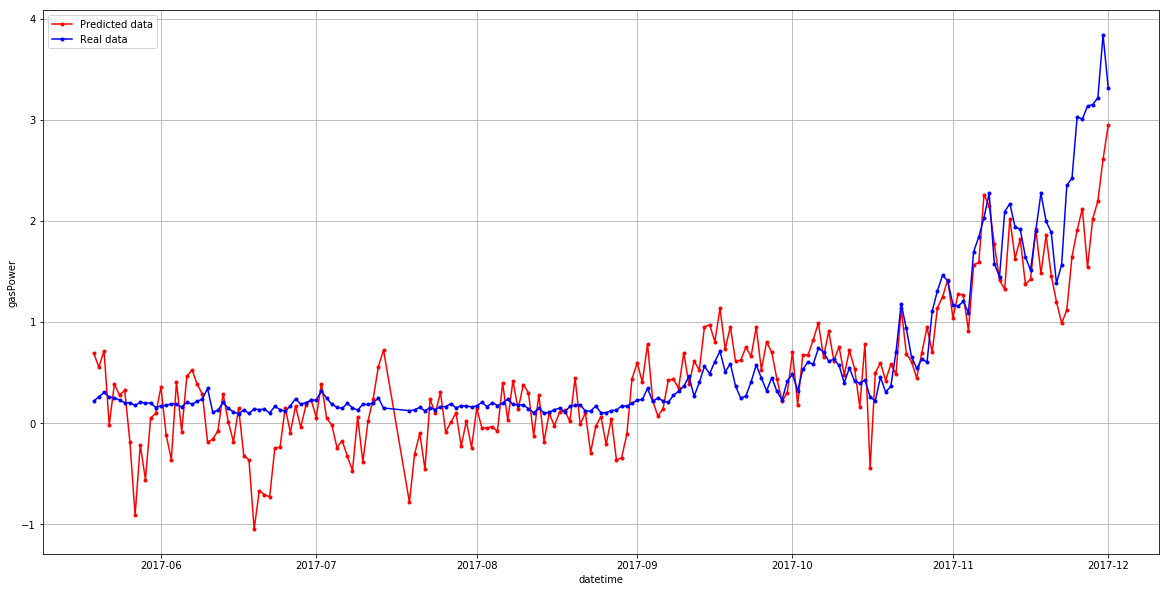

In [9]:
plt.figure(figsize=(20,10))

#This will plot the prediction 
plt.plot(x_datetime,y_result,'.-',color='r',label='Predicted data')
plt.xlabel('datetime')
plt.ylabel('gasPower')
plt.grid(True)

#This will plot the real data
plt.plot(x_datetime,y_test,'.-',color='b',label='Real data')
plt.xlabel('datetime')
plt.ylabel('gasPower')
plt.legend()
plt.show()